# Capstone Project: Stock Returns Predictor

In [3]:
#!pip install -U pip
#!pip install -U setuptools wheel
#!pip install -U "mxnet<2.0.0"

In [6]:
!unzip -o the-winton-stock-market-challenge.zip

Archive:  the-winton-stock-market-challenge.zip
  inflating: sample_submission_2.csv.zip  
  inflating: test_2.csv.zip          
  inflating: train.csv.zip           


In [7]:
#!unzip -o train.csv.zip
#!unzip test_2.csv.zip
#!unzip sample_submission_2.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
   creating: __MACOSX/
  inflating: __MACOSX/._train.csv    
Archive:  test_2.csv.zip
  inflating: test_2.csv              
  inflating: __MACOSX/._test_2.csv   
Archive:  sample_submission_2.csv.zip
  inflating: sample_submission_2.csv  
  inflating: __MACOSX/._sample_submission_2.csv  


In [9]:
#!pip install autogluon --no-cache-dir

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor

Matplotlib is building the font cache; this may take a moment.


In [11]:
training = pd.read_csv("train.csv")
training.columns

Index(['Id', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       ...
       'Ret_175', 'Ret_176', 'Ret_177', 'Ret_178', 'Ret_179', 'Ret_180',
       'Ret_PlusOne', 'Ret_PlusTwo', 'Weight_Intraday', 'Weight_Daily'],
      dtype='object', length=211)

In [12]:
training.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [13]:
test = pd.read_csv("test_2.csv")
test.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,1,1.0,1.412783,-0.056284,NaN,10.0,0.413226,18871,0.2138,11.0,...,0.000370,-0.000762,NaN,0.000366,-0.002444,-0.001301,-0.000917,0.000762,-0.000556,0.000759
1,2,NaN,NaN,0.907973,1.002425,7.0,-0.257825,5852,0.2138,13.0,...,0.000457,0.000003,-0.000007,-0.000003,-0.000012,-0.000463,-0.000003,-0.000002,0.000468,-0.000012
2,3,NaN,-0.607583,1.076668,0.517865,5.0,0.947340,76935,0.0105,10.0,...,0.000003,0.000157,-0.000181,0.000003,NaN,0.000164,0.000353,0.000704,-0.000168,-0.000006
3,4,NaN,2.230240,0.223222,NaN,1.0,NaN,84573,0.3318,13.0,...,0.000010,-0.000792,-0.000479,0.000017,0.000170,-0.001079,0.000320,0.000006,0.001392,-0.001850
4,5,NaN,0.360399,0.597896,-0.145497,10.0,0.275744,89615,0.0099,8.0,...,0.000447,0.000489,-0.000233,-0.000495,0.000057,-0.000050,-0.000011,-0.000377,0.000227,-0.000114


In [14]:
notNanPercentage = np.sum(~training.isna())/len(training)
notNanPercentage.sort_values()

Feature_1       0.167175
Feature_10      0.513225
Feature_2       0.771350
Feature_20      0.804350
Feature_4       0.806975
                  ...   
Ret_135         1.000000
Ret_134         1.000000
Ret_133         1.000000
Ret_139         1.000000
Weight_Daily    1.000000
Length: 211, dtype: float64

We could see only 16% data of Feature_1 column and <50% data of of Feature_10 column contain values, so we decide to drop those two columns when we build the model.

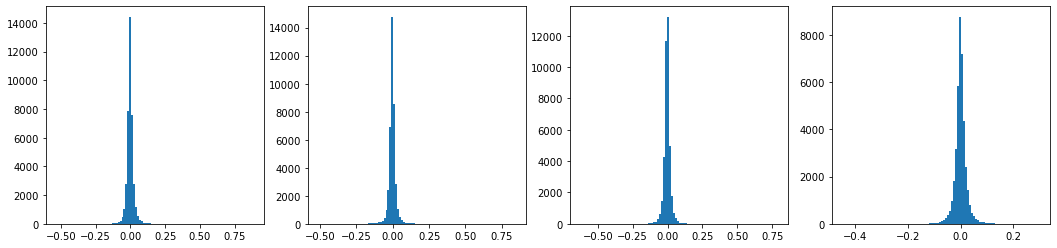

In [15]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
plt.hist(training.Ret_MinusTwo, bins=100)
plt.subplot(1,4,2)
plt.hist(training.Ret_MinusOne, bins=100)
plt.subplot(1,4,3)
plt.hist(training.Ret_PlusOne, bins=100) # target variable
plt.subplot(1,4,4)
plt.hist(training.Ret_PlusTwo, bins=100) # target variable
plt.show()

Since we found both features (Ret_MinusTwo, Ret_MinusOne) and target variables are approximately normal, we could assume they are multi-normal, and the linear regression assumption-multinormal distribution-is satisfied.

In [16]:
train = training.sample(frac=0.9,random_state=42)
validation = training.drop(train.index)

In [17]:
len(train)

36000

In [19]:
feature = [ 'Ret_MinusTwo','Ret_MinusOne']

feature += ['Feature_{}'.format(i) for i in range(1, 26)]
feature.remove('Feature_1')
feature.remove('Feature_10')

#feature += ['Ret_{}'.format(i) for i in range(2, 121)]

In [20]:
#Prepare features for modeling daily returns
Ret_PlusOneFeature = feature + ['Ret_PlusOne']
Ret_PlusTwoFeature = feature + ['Ret_PlusTwo'] 

In [21]:
train[Ret_PlusOneFeature].head()

,Ret_MinusTwo,Ret_MinusOne,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_PlusOne
32823,-0.013260,0.000590,0.479581,0.199240,-0.788162,5.0,-0.758338,86137,0.3650,9.0,...,0.128854,-0.319879,-0.961432,3.0,-0.728740,-0.381317,0.304771,-0.328039,-0.305417,0.011966
16298,0.015272,-0.087335,0.261451,-0.128693,-0.048090,7.0,NaN,51411,0.2654,11.0,...,0.158995,-0.444783,-0.393301,2.0,-0.660029,-0.118927,-0.164613,-0.032897,-0.175894,-0.004402
28505,-0.004651,-0.007407,0.132693,0.011800,0.025669,8.0,-0.145155,92235,0.2109,14.0,...,-0.774073,0.699686,-1.286713,7.0,-0.286466,-0.206454,0.957931,-2.327268,-0.679526,-0.001938
6689,-0.043868,-0.015366,0.707221,-0.799214,-0.878790,5.0,-0.513552,8912,0.0102,5.0,...,0.776121,-0.602150,NaN,NaN,-1.290809,0.113874,-0.151860,0.686725,-0.052387,0.017789
26893,-0.007558,-0.017871,1.471640,NaN,NaN,2.0,0.345870,58934,0.0111,6.0,...,-0.347625,0.143506,-0.866299,2.0,0.137590,-2.136254,0.791216,1.145140,-0.596923,0.007983


### AutoML predictor for modeling D+1, D+2 daily returns

In [22]:
predictor_D1 = TabularPredictor(label="Ret_PlusOne",
                                eval_metric="root_mean_squared_error"
                               ).fit(
    train_data=train[Ret_PlusOneFeature], 
    time_limit=600, 
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220716_195336/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220716_195336/"
AutoGluon Version:  0.5.0
Python Version:     3.8.12
Operating System:   Linux
Train Data Rows:    36000
Train Data Columns: 25
Label Column: Ret_PlusOne
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.7956016001987842, -0.6276902119251764, -0.00017, 0.02518)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    14934.47 MB
	

In [23]:
from sklearn.metrics import mean_squared_error
predictionD1 = predictor_D1.predict(validation[feature])
D1Error = np.sqrt(mean_squared_error(validation["Ret_PlusOne"], predictionD1))
D1Error

0.018975024779882443

In [24]:
predictor_D2 = TabularPredictor(label="Ret_PlusTwo",
                                eval_metric="root_mean_squared_error",
                                verbosity = 1).fit(
    train_data=train[Ret_PlusTwoFeature], 
    time_limit=600, 
    presets="best_quality")
predictionD2 = predictor_D2.predict(validation[feature])
D2Error = np.sqrt(mean_squared_error(validation["Ret_PlusTwo"], predictionD2))
D2Error

No path specified. Models will be saved in: "AutogluonModels/ag-20220716_200623/"
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.


0.019068396339328015

The AutoGluon algorithm automatically chooses the best machine learning model for our predictor, and the validation error (RMSE) of AutoML predictor on D+1 return is 0.0189 and 0.01907 for D+2 return. In total, the RMSE error for D+1 & D+2 return is 0.03797.

### Deep Learning predictor for modeling D+1, D+2 daily returns

In [25]:
import torch
import torch.nn as nn

In [26]:
x_col = feature
y_col = ['Ret_PlusOne','Ret_PlusTwo']

In [27]:
train = train.fillna(method="bfill").fillna(method="ffill")
validation = validation.fillna(method="bfill").fillna(method="ffill")

In [33]:
x_train, y_train = train[x_col].values, train[y_col].values
x_test, y_test = validation[x_col].values, validation[y_col].values

import torch.utils.data as data_utils
PyTorchtrain = data_utils.TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
train_loader = data_utils.DataLoader(PyTorchtrain, batch_size=128, shuffle=False)

In [39]:
Dmodel = nn.Sequential(nn.Linear(25, 16),
                      nn.Tanh(),
                      nn.Linear(16, 4),
                      nn.Tanh(),
                      nn.Linear(4, 2))
criterion = torch.nn.MSELoss(reduction='sum')
optimiser = torch.optim.SGD(Dmodel.parameters(), lr =1e-5)
for i in range(len(list(Dmodel.parameters()))):
    print(list(Dmodel.parameters())[i].size())

torch.Size([16, 25])
torch.Size([16])
torch.Size([4, 16])
torch.Size([4])
torch.Size([2, 4])
torch.Size([2])


Since the magnitude of our target variable is very small (usually returns are smaller than 0.1), I have set tanh() as the activation function, which returns values from -1 to 1. 

In [40]:
num_epochs = 10
tot = len(train)
for t in range(num_epochs):
    running_loss = 0
    for data, target in train_loader:
        pred = Dmodel(data)
        loss = criterion(pred, target)
        running_loss += loss
        #print(pred, target)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    print("Epoch ", t, "RMSE: ", np.sqrt((running_loss/tot).detach().numpy()))

Epoch  0 RMSE:  0.08016396
Epoch  1 RMSE:  0.034941074
Epoch  2 RMSE:  0.034937304
Epoch  3 RMSE:  0.034937315
Epoch  4 RMSE:  0.034937315
Epoch  5 RMSE:  0.034937315
Epoch  6 RMSE:  0.034937315
Epoch  7 RMSE:  0.03493732
Epoch  8 RMSE:  0.034937315
Epoch  9 RMSE:  0.034937315


In [42]:
D1D2pred = Dmodel(torch.Tensor(x_test))
DError_torch = criterion(D1D2pred, torch.Tensor(y_test))
DError = np.sqrt(DError_torch.detach().numpy()/len(validation))
DError

0.033492102204435104

After comparing the validation error (RMSE for D+1 & D+2) for each predictior, the deep learning predictor (even with very simple model structure) has a lower RMSE; therefore, we will choose deep learning model for our daily return predictor.

### Deep Learning predictor for modeling Intraday returns

In [57]:
Intrafeature = feature + ['Ret_{}'.format(i) for i in range(2, 121)]
x_col = Intrafeature
y_col = ['Ret_{}'.format(i) for i in range(121, 181)]

In [58]:
x_train, y_train = train[x_col].values, train[y_col].values
x_test, y_test = validation[x_col].values, validation[y_col].values

import torch.utils.data as data_utils
PyTorchtrain = data_utils.TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
train_loader = data_utils.DataLoader(PyTorchtrain, batch_size=16, shuffle=False)

In [59]:
IntraModel = nn.Sequential(nn.Linear(144, 256),
                           nn.Tanh(),
                           nn.Linear(256, 128),
                           nn.Tanh(),
                           nn.Linear(128, 64),
                           nn.Tanh(),
                           nn.Linear(64, 60))
criterion = torch.nn.MSELoss(reduction='sum')
optimiser = torch.optim.SGD(IntraModel.parameters(), lr =1e-5)
for i in range(len(list(IntraModel.parameters()))):
    print(list(IntraModel.parameters())[i].size())

torch.Size([256, 144])
torch.Size([256])
torch.Size([128, 256])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([60, 64])
torch.Size([60])


In [60]:
num_epochs = 20
tot = len(train)
for t in range(num_epochs):
    running_loss = 0
    for data, target in train_loader:
        pred = IntraModel(data)
        loss = criterion(pred, target)
        running_loss += loss
        #print(pred, target)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    print("Epoch ", t, "RMSE: ", np.sqrt((running_loss/tot).detach().numpy()))

Epoch  0 RMSE:  0.19037332
Epoch  1 RMSE:  0.011932794
Epoch  2 RMSE:  0.009378587
Epoch  3 RMSE:  0.009283561
Epoch  4 RMSE:  0.009240259
Epoch  5 RMSE:  0.00921192
Epoch  6 RMSE:  0.009191716
Epoch  7 RMSE:  0.009176469
Epoch  8 RMSE:  0.009164477
Epoch  9 RMSE:  0.009154745
Epoch  10 RMSE:  0.009146656
Epoch  11 RMSE:  0.009139792
Epoch  12 RMSE:  0.009133893
Epoch  13 RMSE:  0.009128748
Epoch  14 RMSE:  0.009124211
Epoch  15 RMSE:  0.009120183
Epoch  16 RMSE:  0.009116575
Epoch  17 RMSE:  0.009113327
Epoch  18 RMSE:  0.009110377
Epoch  19 RMSE:  0.009107693


In [61]:
Intrapred = IntraModel(torch.Tensor(x_test))
IntraError_torch = criterion(Intrapred, torch.Tensor(y_test))
IntraError = np.sqrt(IntraError_torch.detach().numpy()/len(validation))
IntraError

0.008903848675699601

## Inference

In [76]:
submission = pd.read_csv("sample_submission_2.csv")
submission.head(3)

,Id,Predicted
0,1_1,0
1,1_2,0
2,1_3,0


In [63]:
print(submission.shape)

(7440000, 2)


In [64]:
test = test.fillna(method="bfill").fillna(method="ffill")

In [66]:
D1D2TestPred_torch = Dmodel(torch.Tensor(test[feature].values))
D1D2TestPred = D1D2TestPred_torch.detach().numpy()
IntraTestPred_torch = IntraModel(torch.Tensor(test[Intrafeature].values))
IntraTestPred = IntraTestPred_torch.detach().numpy()

In [80]:
IntraTestPred[0]

array([-2.2962689e-05, -4.2147934e-05,  2.4154782e-05,  2.4098903e-05,
        3.7476420e-06,  1.5273690e-06,  4.9471855e-06,  1.8365681e-05,
        4.9248338e-06,  9.9828467e-06, -1.0117888e-05, -3.5494566e-05,
        7.6182187e-06, -1.5627593e-05,  8.0995262e-05, -2.8013252e-05,
        5.6083780e-05,  3.0376017e-05, -4.4248998e-05,  1.2241304e-05,
       -1.8127263e-05, -3.6180019e-05, -2.3446977e-05, -3.7096441e-05,
       -1.4975667e-06, -1.0341406e-05, -9.7453594e-06,  3.6355108e-05,
       -2.0060688e-05, -7.7188015e-06, -1.0743737e-05, -2.4661422e-06,
       -5.2360818e-05, -4.1127205e-06, -1.2665987e-05,  2.7552247e-05,
       -2.3345463e-05,  1.1894852e-05,  1.0408461e-05,  5.5722892e-05,
       -4.6957284e-06, -3.0770898e-06, -4.9896538e-05, -2.0895153e-05,
        2.5443733e-05, -6.1117287e-05,  7.4077398e-05, -3.2503158e-07,
        3.9115548e-06,  4.6502799e-05, -7.3239207e-06, -4.1581690e-05,
        3.2968819e-05, -8.2626939e-06,  7.7016652e-05, -1.8492341e-05,
      

In [79]:
D1D2TestPred[0]

array([-0.00026682,  0.00017121], dtype=float32)

In [81]:
res = []
for i in range(120000):
    res += list(IntraTestPred[i])
    res += list(D1D2TestPred[i])

In [83]:
submission["Predicted"] = res
submission.head()

,Id,Predicted
0,1_1,-0.000023
1,1_2,-0.000042
2,1_3,0.000024
3,1_4,0.000024
4,1_5,0.000004


In [84]:
submission.to_csv("submission.csv")